<a href="https://colab.research.google.com/github/gowthamdongari/Best-README-Template/blob/master/DSA_100_Days/018_Day_(Queue).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are n friends that are playing a game. The friends are sitting in a circle and are numbered from 1 to n in clockwise order. More formally, moving clockwise from the ith friend brings you to the (i+1)th friend for 1 <= i < n, and moving clockwise from the nth friend brings you to the 1st friend.

The rules of the game are as follows:

Start at the 1st friend.
Count the next k friends in the clockwise direction including the friend you started at. The counting wraps around the circle and may count some friends more than once.
The last friend you counted leaves the circle and loses the game.
If there is still more than one friend in the circle, go back to step 2 starting from the friend immediately clockwise of the friend who just lost and repeat.
Else, the last friend in the circle wins the game.
Given the number of friends, n, and an integer k, return the winner of the game.



Example 1:

Input: n = 5, k = 2

Output: 3

Explanation: Here are the steps of the game:

1) Start at friend 1.

2) Count 2 friends clockwise, which are friends 1 and 2.

3) Friend 2 leaves the circle. Next start is friend 3.

4) Count 2 friends clockwise, which are friends 3 and 4.

5) Friend 4 leaves the circle. Next start is friend 5.

6) Count 2 friends clockwise, which are friends 5 and 1.

7) Friend 1 leaves the circle. Next start is friend 3.
8) Count 2 friends clockwise, which are friends 3 and 5.
9) Friend 5 leaves the circle. Only friend 3 is left, so they are the winner.

Example 2:

Input: n = 6, k = 5

Output: 1

Explanation: The friends leave in this order: 5, 4, 6, 2, 3. The winner is friend 1.

In [ ]:
# Brute

def findTheWinner(n, k):
    # Initialize the list of friends numbered from 1 to n
    friends = list(range(1, n + 1))
    index = 0  # Start with the first friend

    # Continue until only one friend is left
    while len(friends) > 1:
        # Calculate the next index to remove based on the current index and k
        index = (index + k - 1) % len(friends)
        # Remove the friend at the calculated index
        friends.pop(index)

    # Return the last remaining friend
    return friends[0]

# Example usage:
print(findTheWinner(5, 2))  # Output: 3
print(findTheWinner(6, 5))  # Output: 1


3
1


Time Complexity:
The findTheWinner function simulates the elimination process for the Josephus problem using a list. Each elimination involves:

Calculating the index to remove an element.
Removing the element from the list.
Since list removals in Python are O(n) operations (where n is the number of elements in the list), and this operation is performed n−1 times, the overall time complexity is O(n 2 ).

Space Complexity:
The space complexity is determined by the additional space used for the friends list, which stores n elements. Thus, the space complexity is O(n).

In [ ]:
# OPT
def findTheWinner(n, k):
    winner = 0  # Start with the base case (when there's only one person)

    # Compute the position of the winner using the iterative approach
    for i in range(1, n):  # The range should be from 1 to n-1 (inclusive)
        winner = (winner + k) % (i + 1)

    return winner + 1  # Adjust the index to match the 1-based indexing

# Example usage:
print(findTheWinner(5, 2))  # Output: 3
print(findTheWinner(6, 5))  # Output: 1



3
1



Time Complexity: O(n), where n is the number of people.

Space Complexity: O(1), since only a constant amount of extra space is used.

In [ ]:
from collections import deque

def findTheWinner(n, k):
    queue = deque(range(1, n + 1))  # Initialize the deque with friends numbered from 1 to n

    while len(queue) > 1:
        # Move the first k-1 friends to the end of the deque
        for _ in range(k - 1):
            queue.append(queue.popleft())
        # Eliminate the k-th friend
        queue.popleft()

    return queue[0]  # The last remaining friend is the winner

# Example usage:
print(findTheWinner(5, 2))  # Output: 3
print(findTheWinner(6, 5))  # Output: 1


3
1


Time Complexity: Each elimination round involves moving k−1 friends and removing one friend.
Moving k−1 friends takes O(k) time, and removing one friend takes O(1) time.
Since there are n−1 elimination rounds, the total time complexity is O(k⋅n).

Space Complexity:
The space complexity is O(n) due to the storage requirements of the deque.

In [ ]:
# This problem famously called josephus
# recursive method

def josephus_recursive(n, k):
    if n == 1:
        return 0  # Base case: the last person remaining is at position 0 (0-based index)
    else:
        return (josephus_recursive(n - 1, k) + k) % n

def findTheWinner_recursive(n, k):
    return josephus_recursive(n, k) + 1  # Convert to 1-based index

# Example usage:
print(findTheWinner_recursive(5, 2))  # Output: 3
print(findTheWinner_recursive(6, 5))  # Output: 1


3
1


You are given two positive integers x and y.

In one operation, you can do one of the four following operations:

Divide x by 11 if x is a multiple of 11.
Divide x by 5 if x is a multiple of 5.
Decrement x by 1.
Increment x by 1.
Return the minimum number of operations required to make x and y equal.



Example 1:

Input: x = 26, y = 1
Output: 3
Explanation: We can make 26 equal to 1 by applying the following operations:
1. Decrement x by 1
2. Divide x by 5
3. Divide x by 5
It can be shown that 3 is the minimum number of operations required to make 26 equal to 1.
Example 2:

Input: x = 54, y = 2
Output: 4
Explanation: We can make 54 equal to 2 by applying the following operations:
1. Increment x by 1
2. Divide x by 11
3. Divide x by 5
4. Increment x by 1
It can be shown that 4 is the minimum number of operations required to make 54 equal to 2.
Example 3:

Input: x = 25, y = 30
Output: 5
Explanation: We can make 25 equal to 30 by applying the following operations:
1. Increment x by 1
2. Increment x by 1
3. Increment x by 1
4. Increment x by 1
5. Increment x by 1
It can be shown that 5 is the minimum number of operations required to make 25 equal to 30.

In [ ]:
from collections import deque

def min_operations(x, y):
    # Initialize the queue with the starting number and zero operations
    queue = deque([(x, 0)])
    # A set to keep track of visited numbers to avoid processing them again
    visited = set()
    visited.add(x)

    while queue:
        current, operations = queue.popleft()

        # If the current number equals the target, return the number of operations
        if current == y:
            return operations

        # Generate the possible next states
        next_states = []

        # Check if we can divide by 11
        if current % 11 == 0:
            next_states.append(current // 11)

        # Check if we can divide by 5
        if current % 5 == 0:
            next_states.append(current // 5)

        # Always consider decrementing and incrementing by 1
        next_states.append(current - 1)
        next_states.append(current + 1)

        # Process each next state
        for next_state in next_states:
            # If the next state hasn't been visited yet
            if next_state not in visited:
                visited.add(next_state)
                queue.append((next_state, operations + 1))

    # If no solution is found, return -1 (although this case shouldn't occur with valid inputs)
    return -1

# Example usage
print(min_operations(26, 1))  # Output: 3
print(min_operations(54, 2))  # Output: 4
print(min_operations(25, 30)) # Output: 5


3
4
5


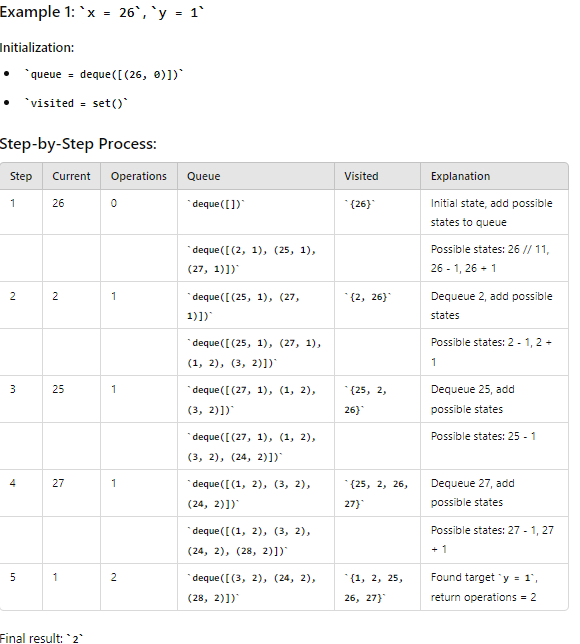

Given an array of non-negative integers arr, you are initially positioned at start index of the array. When you are at index i, you can jump to i + arr[i] or i - arr[i], check if you can reach any index with value 0.

Notice that you can not jump outside of the array at any time.



Example 1:

Input: arr = [4,2,3,0,3,1,2], start = 5

Output: true

Explanation:

All possible ways to reach at index 3 with value 0 are:

index 5 -> index 4 -> index 1 -> index 3

index 5 -> index 6 -> index 4 -> index 1 -> index 3

Example 2:

Input: arr = [4,2,3,0,3,1,2], start = 0

Output: true

Explanation:

One possible way to reach at index 3 with value 0 is:

index 0 -> index 4 -> index 1 -> index 3

Example 3:

Input: arr = [3,0,2,1,2], start = 2

Output: false

Explanation: There is no way to reach at index 1 with value 0.

In [ ]:
def canReach(arr, start):
    n = len(arr)  # Get the length of the array
    q = [start]   # Initialize the queue with the starting index

    while q:
        node = q.pop(0)  # Dequeue the first element (current position)

        # Check if the current position has a value of zero
        if arr[node] == 0:
            return True  # If so, we have reached a zero, so return True

        # If the value is negative, it means this position has been visited
        if arr[node] < 0:
            continue  # Skip to the next iteration of the loop

        # Calculate the next positions to visit
        for i in [node + arr[node], node - arr[node]]:
            if 0 <= i < n:  # Ensure the next position is within bounds
                q.append(i)  # Add the next position to the queue

        # Mark the current position as visited by negating its value
        arr[node] = -arr[node]

    return False  # Return False if the queue is empty and no zero was found

# Example usage:
arr = [4, 2, 3, 0, 3, 1, 2]
start = 5
print(canReach(arr, start))  # Output should be True

arr = [4, 2, 3, 0, 3, 1, 2]
start = 0
print(canReach(arr, start))  # Output should be True

arr = [3, 0, 2, 1, 2]
start = 2
print(canReach(arr, start))  # Output should be False


True
True
False


Assume N is the length of arr.

Time complexity: O(N) since we will visit every index at most once.

Space complexity : O(N) since it needs q to store next index. In fact, q would keep at most two levels of nodes. Since we got two children for each node, the traversal of this solution is a binary tree. The maximum number of nodes within a single level for a binary tree would be N/2, so the maximum length of q is O(N/2 + N/2)=O(N)

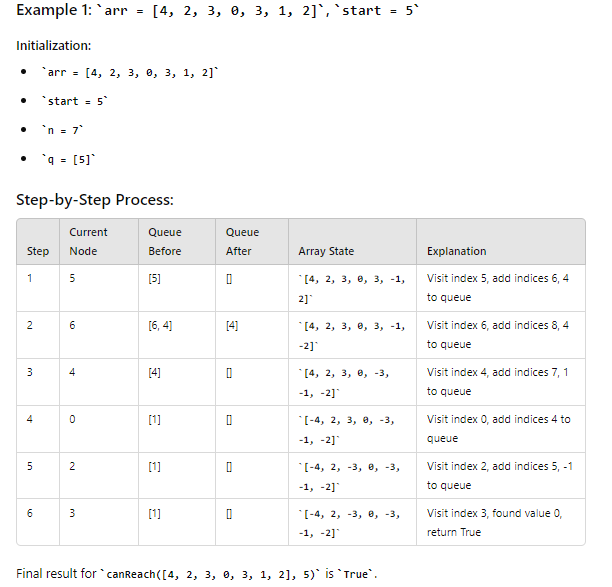